In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
spotify_df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

# Sayısal gösterimi bastırmak için float formatını ayarla
pd.options.display.float_format = '{:,.0f}'.format


# Hatalı satırları temizle
spotify_df = spotify_df[~spotify_df['streams'].str.contains('BPM110Key')]

# 'streams' sütununu sayısala çevir
spotify_df['streams'] = spotify_df['streams'].str.replace(',', '').astype(float)

### Most Streamed Songs

In [18]:
most_streamed = spotify_df.sort_values(by='streams', ascending=False).head(10)

most_streamed

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,"3,703,895,074",672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,"3,562,543,890",33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,"2,887,241,814",440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,"2,864,791,672",533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,"2,808,096,550",372,...,90,D,Major,76,91,50,54,0,7,5
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,"2,713,922,350",433,...,104,C#,Major,77,36,63,1,0,36,5
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,"2,665,343,922",492,...,170,C#,Major,59,48,76,4,0,10,5
140,Believer,Imagine Dragons,1,2017,1,31,18986,23,"2,594,040,133",250,...,125,A#,Minor,77,74,78,4,0,23,11
725,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,"2,591,224,264",315,...,95,G#,Major,75,64,52,41,0,11,3
48,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,"2,565,529,693",281,...,186,G,Major,68,49,59,16,0,13,28


### Most Streamed Artists

In [19]:
top_artists = spotify_df.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False).reset_index()

top_artists.head(10)

,artist(s)_name,streams
0,The Weeknd,"14,185,552,870"
1,Taylor Swift,"14,053,658,300"
2,Ed Sheeran,"13,908,947,204"
3,Harry Styles,"11,608,645,649"
4,Bad Bunny,"9,997,799,607"
5,Olivia Rodrigo,"7,442,148,916"
6,Eminem,"6,183,805,596"
7,Bruno Mars,"5,846,920,599"
8,Arctic Monkeys,"5,569,806,731"
9,Imagine Dragons,"5,272,484,650"


##### Visualization

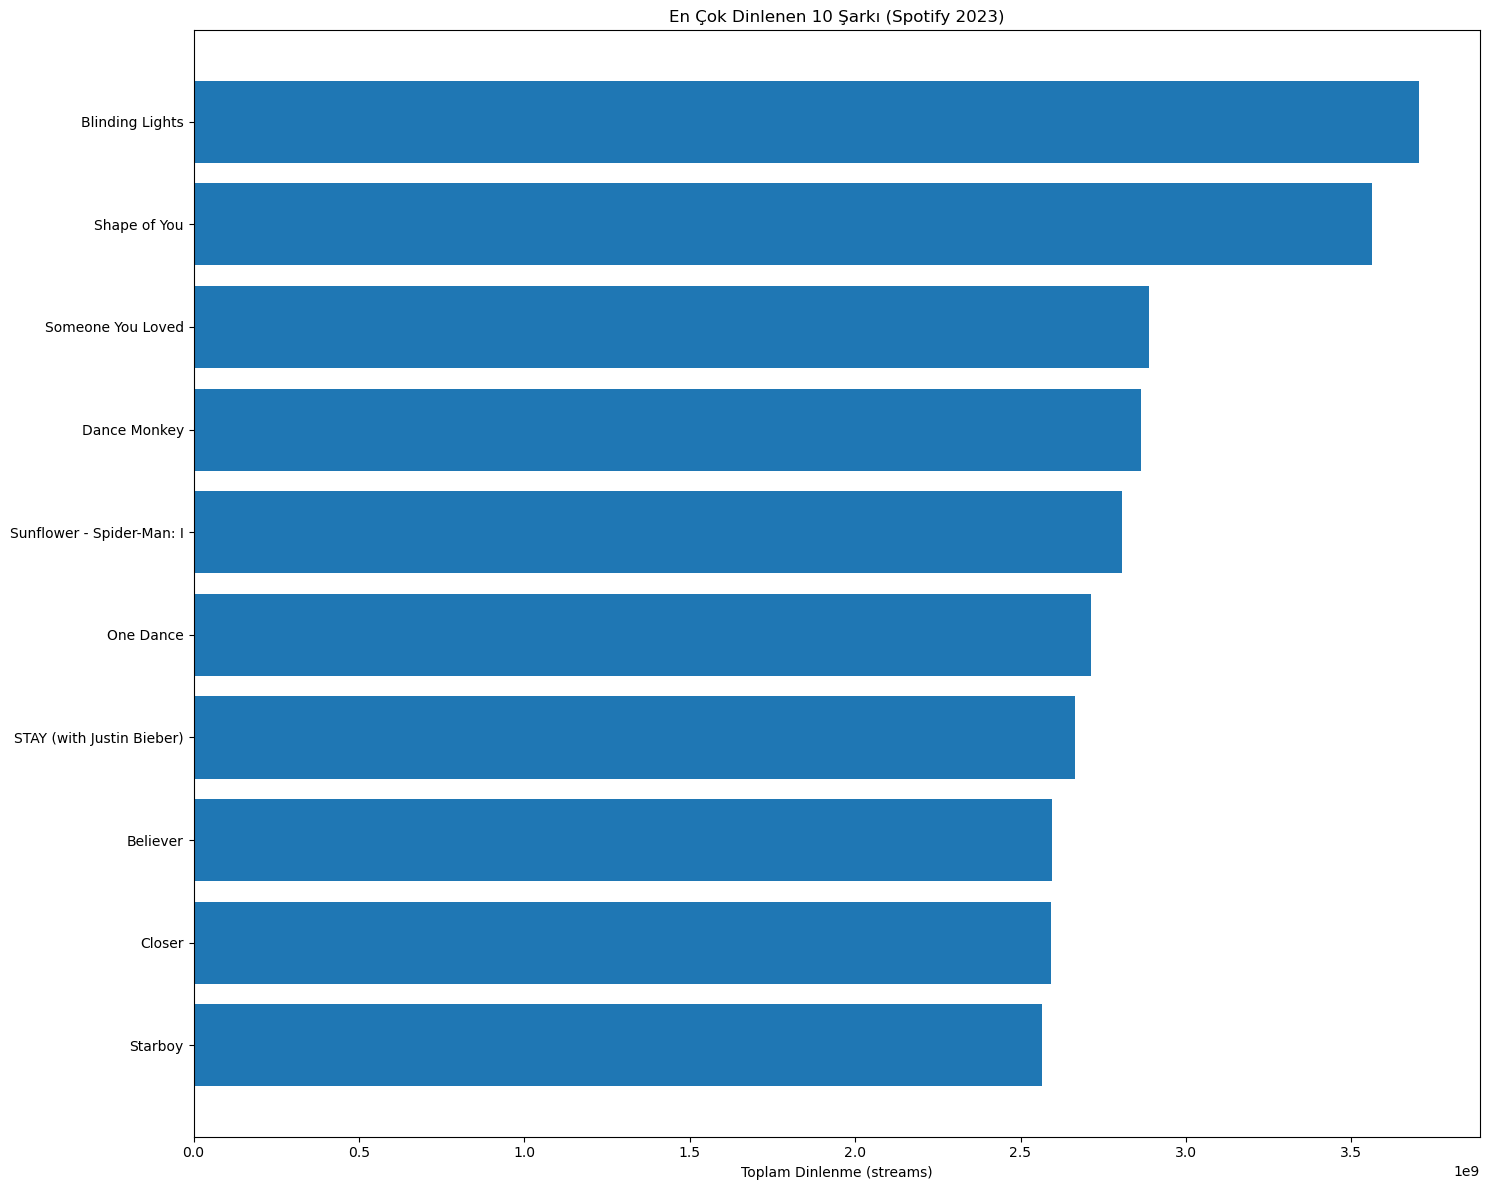

In [6]:
top_songs = most_streamed[['track_name', 'streams']].copy()
top_songs['track_name'] = top_songs['track_name'].str.slice(0, 25)  # İsimleri kısalt

# Grafik oluştur 
plt.figure(figsize=(15, 12)) 
plt.barh(top_songs['track_name'], top_songs['streams']) 
plt.xlabel('Toplam Dinlenme (streams)')  
plt.title('En Çok Dinlenen 10 Şarkı (Spotify 2023)')
plt.gca().invert_yaxis()  # En çok dinlenen en üstte olsun
plt.tight_layout()
plt.show()

### En popüler 10 sanatçı analizi

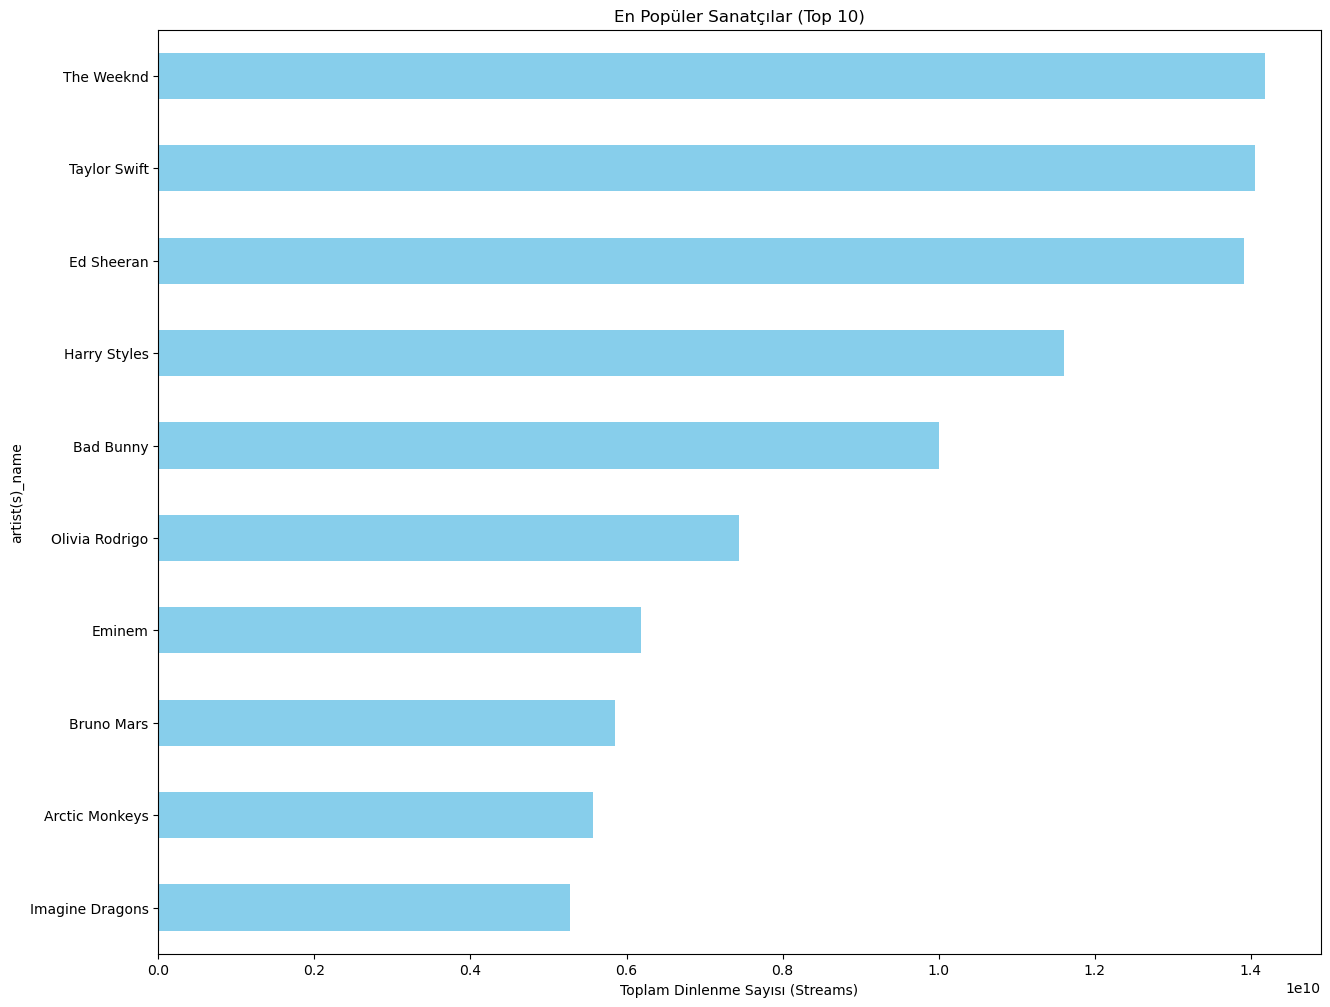

In [7]:
top_artists = spotify_df.groupby('artist(s)_name')['streams'].sum().nlargest(10)
top_artists.plot(kind='barh', color='skyblue', figsize=(15,12))
plt.xlabel('Toplam Dinlenme Sayısı (Streams)')
plt.title('En Popüler Sanatçılar (Top 10)')
plt.gca().invert_yaxis()
plt.show()

### Yayın yılına göre popülerlik analizi

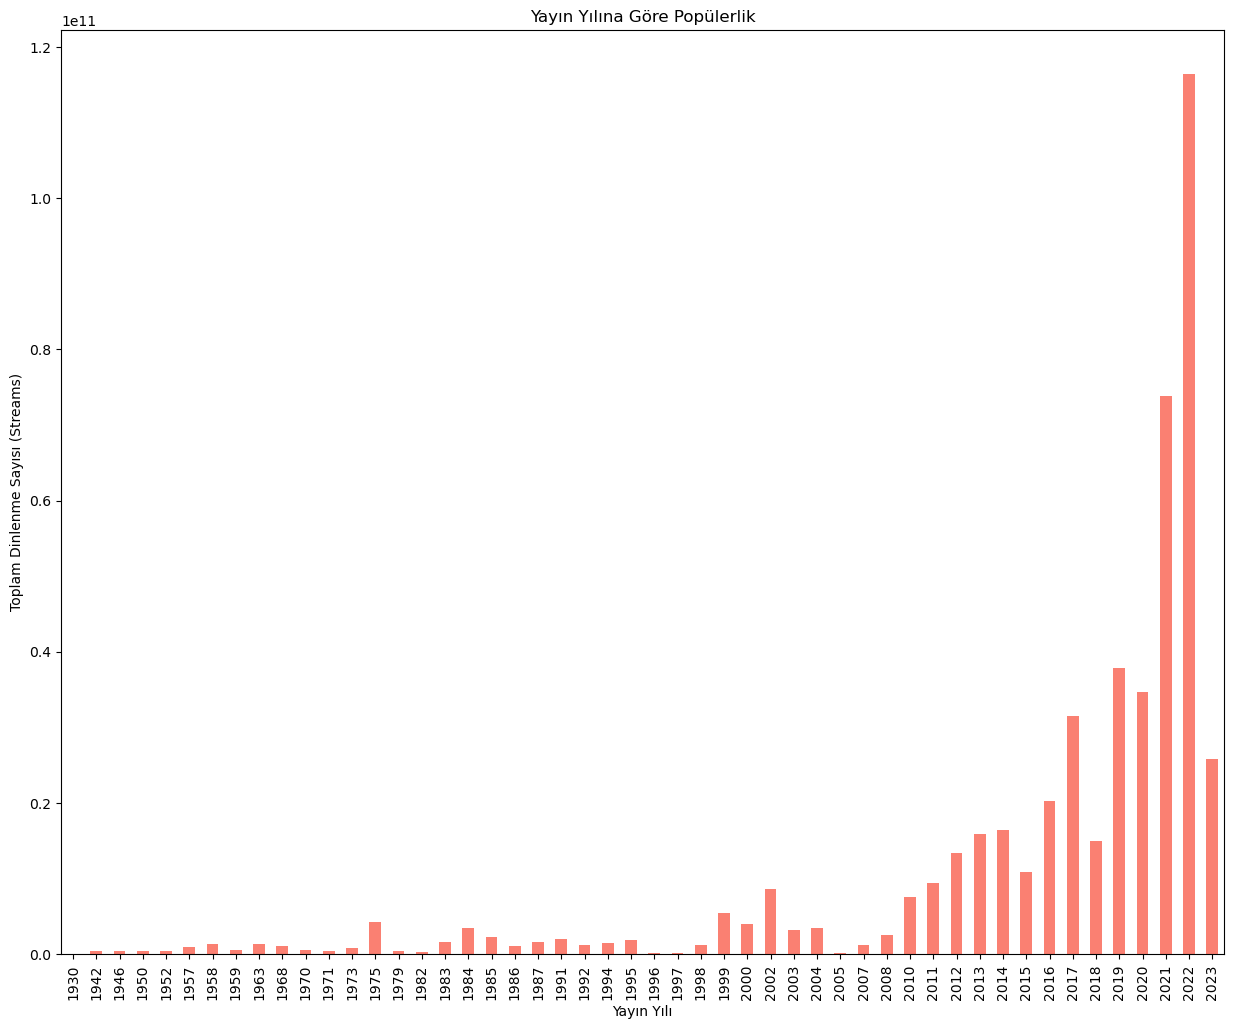

In [21]:
streams_by_year = spotify_df.groupby('released_year')['streams'].sum()
streams_by_year.plot(kind='bar', color='salmon', figsize=(15,12))
plt.xlabel('Yayın Yılı')
plt.ylabel('Toplam Dinlenme Sayısı (Streams)')
plt.title('Yayın Yılına Göre Popülerlik')
plt.show()

### Özelliklerin korelasyonu analizi


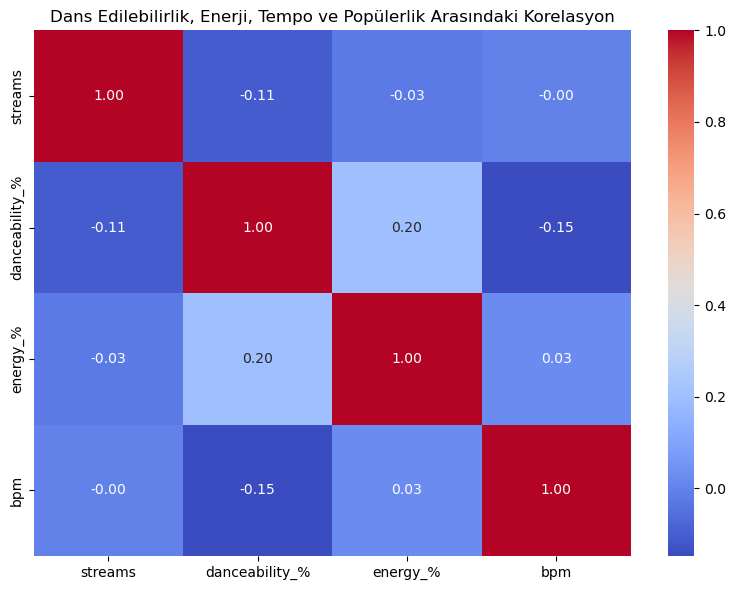

In [ ]:
# İlgili sütunların korelasyonlarını hesaplayalım
subset = spotify_df[['streams', 'danceability_%', 'energy_%', 'bpm']]
subset = subset.dropna()

# Korelasyon matrisi
corr_matrix = subset.corr()

# Korelasyon ısı haritasını çiz
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Dans Edilebilirlik, Enerji, Tempo ve Popülerlik Arasındaki Korelasyon")
plt.tight_layout()
plt.show()

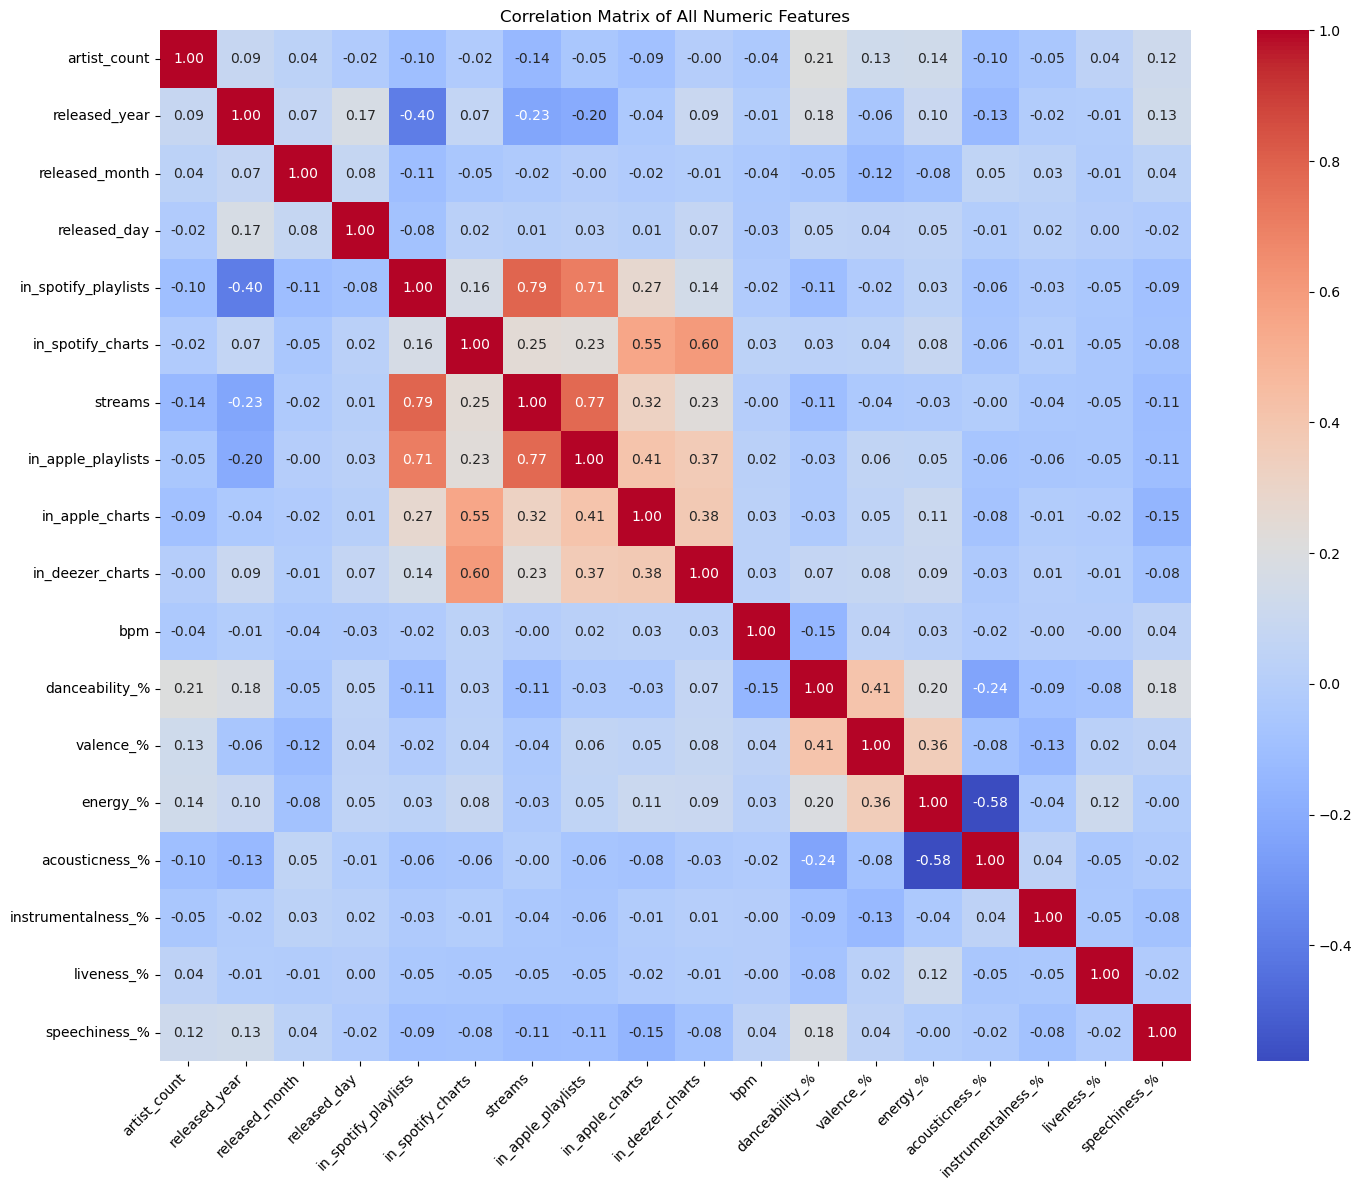

In [24]:
# Select all numeric columns for correlation analysis
numeric_columns = spotify_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = spotify_df[numeric_columns].corr()

# Create a larger figure for better visibility
plt.figure(figsize=(15, 12))

# Create heatmap with annotations
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm',
            fmt='.2f',
            square=True)

plt.title('Correlation Matrix of All Numeric Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Sanatçı İşbirliklerinin Etkisi

C:\Users\Asus\AppData\Local\Temp\ipykernel_30024\3958616297.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_streams_by_artist_count, x='artist_count', y='streams', palette='viridis')


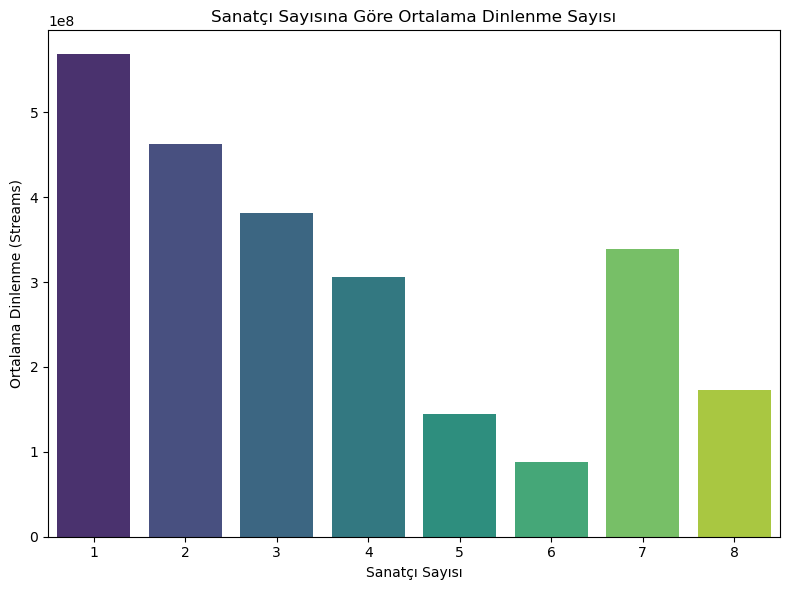

In [23]:
avg_streams_by_artist_count = spotify_df.groupby('artist_count')['streams'].mean().reset_index()

# Görselleştirme
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_streams_by_artist_count, x='artist_count', y='streams', palette='viridis')
plt.title("Sanatçı Sayısına Göre Ortalama Dinlenme Sayısı")
plt.xlabel("Sanatçı Sayısı")
plt.ylabel("Ortalama Dinlenme (Streams)")
plt.tight_layout()
plt.show()

### Trend tahmini için makine öğrenmesi modeli


In [ ]:
features = ['bpm', 'energy_%', 'danceability_%', 'valence_%', 'artist_count',
            'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']

spotify_ml_df = spotify_df.dropna(subset=features + ['streams'])
X = spotify_ml_df[features]
y = spotify_ml_df['streams']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model değerlendirme
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')


MAE: 200010154.89944667
MSE: 7.774340650236994e+16
RMSE: 278825046.40431774
R2: 0.6824113932517301


c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
